In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms
import sklearn.datasets as skdata
from sklearn.preprocessing import StandardScaler

In [0]:
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)

x_train = torch.autograd.Variable(torch.Tensor(imagenes).float())
x_train = x_train.unsqueeze(1)

mean = x_train.mean(dim=0)
std = x_train.std(dim=0)
std[std==0]=1.0

for i in range(len(x_train)):
    x_train[i] = (x_train[i]-mean)/std


In [0]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 20, kernel_size=2, stride=2),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(20,40,kernel_size=2),
            torch.nn.ReLU(True))
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose2d(40,20,kernel_size=2),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(20,1,kernel_size=2, stride=2),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
num_epochs = 200
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)


In [350]:
loss_values = np.zeros(num_epochs)
for epoch in range(num_epochs):
    output = model(x_train)
    loss = distance(output, x_train)
    loss_values[epoch] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

epoch [1/200], loss:0.9671
epoch [2/200], loss:0.9169
epoch [3/200], loss:0.8654
epoch [4/200], loss:0.7952
epoch [5/200], loss:0.7283
epoch [6/200], loss:0.6734
epoch [7/200], loss:0.6258
epoch [8/200], loss:0.5914
epoch [9/200], loss:0.5650
epoch [10/200], loss:0.5417
epoch [11/200], loss:0.5282
epoch [12/200], loss:0.5099
epoch [13/200], loss:0.4981
epoch [14/200], loss:0.4849
epoch [15/200], loss:0.4732
epoch [16/200], loss:0.4690
epoch [17/200], loss:0.4630
epoch [18/200], loss:0.4577
epoch [19/200], loss:0.4482
epoch [20/200], loss:0.4413
epoch [21/200], loss:0.4320
epoch [22/200], loss:0.4258
epoch [23/200], loss:0.4185
epoch [24/200], loss:0.4125
epoch [25/200], loss:0.4061
epoch [26/200], loss:0.4008
epoch [27/200], loss:0.3960
epoch [28/200], loss:0.3919
epoch [29/200], loss:0.3890
epoch [30/200], loss:0.3852
epoch [31/200], loss:0.3824
epoch [32/200], loss:0.3793
epoch [33/200], loss:0.3768
epoch [34/200], loss:0.3742
epoch [35/200], loss:0.3725
epoch [36/200], loss:0.3705
e

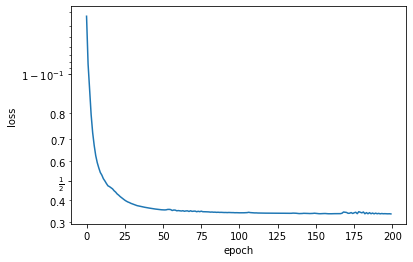

In [351]:
plt.plot(np.arange(num_epochs), loss_values)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('logit')

In [0]:
x_transform = model(x_train)
latent_space = model.encoder(x_train)

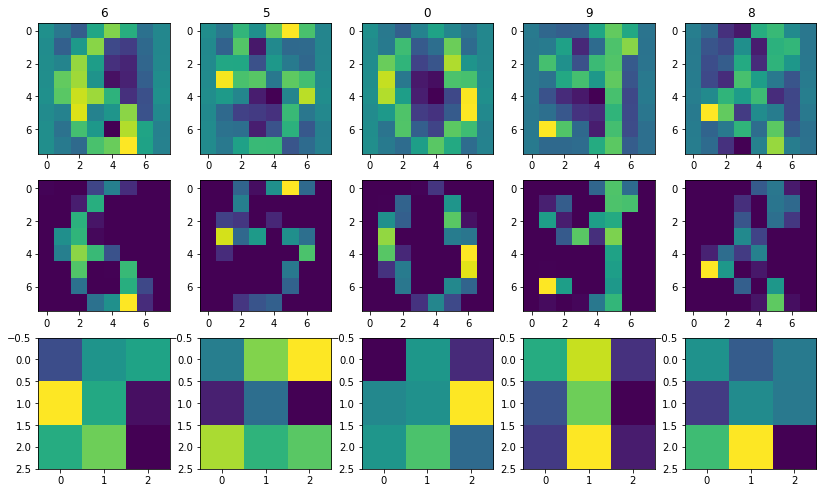

In [353]:
plt.figure(figsize=(14,14))
offset = 550
for i in range(5):
    plt.subplot(5,5,i+1) #imagenes originales
    plt.imshow(x_train[i+offset][0].detach().numpy())
    plt.title(target[i+offset])
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())